# Data Analysis - CRISP-DM Modeling Phase


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Load the prepared dataset from data preparation phase
PREPARED_PATH = "../data/processed/merged_clean_data.csv"

print("="*80)
print("LOADING PREPARED DATA")
print("="*80)

df = pd.read_csv(PREPARED_PATH)
print(f"✅ Data loaded: {PREPARED_PATH}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn names ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "="*80)
print("First 5 rows:")
print("="*80)
display(df.head())

LOADING PREPARED DATA
✅ Data loaded: ../data/processed/merged_clean_data.csv
Shape: 31,873 rows × 24 columns

Column names (24):
   1. country
   2. threshold
   3. area_ha_x
   4. extent_2000_ha
   5. extent_2010_ha
   6. gain_2000-2012_ha
   7. tree_cover_loss_ha
   8. year
   9. area_ha_y
  10. primary_forest_loss_ha
  11. hard_commodities
  12. logging
  13. other_natural_disturbances
  14. permanent_agriculture
  15. settlements_infrastructure
  16. shifting_cultivation
  17. wildfire
  18. umd_tree_cover_extent_2000__ha
  19. gfw_aboveground_carbon_stocks_2000__mg_c
  20. avg_gfw_aboveground_carbon_stocks_2000__mg_c_ha-1
  21. gfw_forest_carbon_gross_emissions__mg_co2e_yr-1
  22. gfw_forest_carbon_gross_removals__mg_co2_yr-1
  23. gfw_forest_carbon_net_flux__mg_co2e_yr-1
  24. carbon_gross_emissions_MgCO2e

First 5 rows:


,country,threshold,area_ha_x,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tree_cover_loss_ha,year,area_ha_y,primary_forest_loss_ha,...,settlements_infrastructure,shifting_cultivation,wildfire,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__mg_c,avg_gfw_aboveground_carbon_stocks_2000__mg_c_ha-1,gfw_forest_carbon_gross_emissions__mg_co2e_yr-1,gfw_forest_carbon_gross_removals__mg_co2_yr-1,gfw_forest_carbon_net_flux__mg_co2e_yr-1,carbon_gross_emissions_MgCO2e
0,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,103.0,2001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,214.0,2002,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,267.0,2003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,226.0,2004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,268.0,2005,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 1: Global Forest Loss Trends

### Goal: Analyze global and temporal trends in forest loss


### 2.1 Global Forest Loss Trend Over Time


In [2]:
yearly_loss = df.groupby("year", as_index=False)["tree_cover_loss_ha"].sum()

print("Global Tree Cover Loss by Year:")
display(yearly_loss)

fig = px.line(yearly_loss, x="year", y="tree_cover_loss_ha",
              title="🌲 Global Tree Cover Loss Trend (2001–2024)",
              labels={"tree_cover_loss_ha": "Tree Cover Loss (hectares)", "year": "Year"},
              markers=True)
fig.update_traces(line_width=3, marker_size=8)
fig.show()

yearly_loss['yoy_change'] = yearly_loss['tree_cover_loss_ha'].pct_change() * 100
yearly_loss['yoy_change_abs'] = yearly_loss['tree_cover_loss_ha'].diff()

print("\nYear-over-Year Changes:")
display(yearly_loss[['year', 'tree_cover_loss_ha', 'yoy_change', 'yoy_change_abs']].tail(10))


Global Tree Cover Loss by Year:


,year,tree_cover_loss_ha
0,2001,104999330.0
1,2002,128075550.0
2,2003,112599139.0
3,2004,154422712.0
4,2005,141835174.0
5,2006,138218623.0
6,2007,143841216.0
7,2008,145091624.0
8,2009,133484522.0
9,2010,144537490.0



Year-over-Year Changes:


,year,tree_cover_loss_ha,yoy_change,yoy_change_abs
14,2015,153195362.0,-17.382593,-32232101.0
15,2016,233305055.0,52.292505,80109693.0
16,2017,231781946.0,-0.652840,-1523109.0
17,2018,195185806.0,-15.789038,-36596140.0
18,2019,191042379.0,-2.122812,-4143427.0
19,2020,206278929.0,7.975482,15236550.0
20,2021,198950406.0,-3.552725,-7328523.0
21,2022,180173900.0,-9.437782,-18776506.0
22,2023,224008292.0,24.328936,43834392.0
23,2024,235867061.0,5.293897,11858769.0


**Findings:**

From analyzing global forest loss trends over the 24-year period (2001-2024), we discovered:

1. **Overall Trend: Increasing Forest Loss**
   - **Average annual loss increased by 43.7%** between the first half (2001-2012) and second half (2013-2024) of the period
   - First half average: **139.0 million hectares/year** (2001-2012)
   - Second half average: **199.8 million hectares/year** (2013-2024)
   - This represents a concerning acceleration in global deforestation rates

2. **Total Forest Loss**
   - **Cumulative loss (2001-2024): 4.07 billion hectares**
   - **Average annual loss: 169.4 million hectares**
   - The scale of loss highlights the urgent need for global conservation action

3. **Peak Years of Forest Loss**
   - **Highest loss year: 2024** with **235.9 million hectares** (worst year on record)
   - **Second highest: 2016** with **233.3 million hectares**
   - **Third highest: 2017** with **231.8 million hectares**
   - Recent years (2016-2017, 2023-2024) show the highest loss rates, indicating an accelerating crisis

4. **Lowest Loss Years**
   - **Lowest loss year: 2001** with **105.0 million hectares** (baseline year)
   - Early 2000s (2001-2003) had the lowest loss rates
   - The minimum loss in 2001 was less than half of the maximum loss in 2024

5. **Year-over-Year Change Patterns (Recent Trends)**
   - **2020-2021**: Decreased by 3.6% (-7.3 million ha) - slight improvement
   - **2021-2022**: Decreased by 9.4% (-18.8 million ha) - largest recent decrease
   - **2022-2023**: **Increased by 24.3%** (+43.8 million ha) - largest single-year increase
   - **2023-2024**: Increased by 5.3% (+11.9 million ha) - continued upward trend
   - Recent volatility suggests unstable patterns, with 2022-2023 showing a dramatic reversal

6. **Temporal Patterns Identified**
   - **Early period (2001-2012)**: Relatively stable with moderate fluctuations, averaging ~139 million ha/year
   - **Mid period (2013-2015)**: Transition period with increasing volatility
   - **Recent period (2016-2024)**: Consistently high loss rates, with 2016-2017 and 2023-2024 as peak periods
   - **Overall pattern**: Clear upward trajectory with increasing volatility in recent years

7. **Key Insights**
   - Forest loss has **more than doubled** from the lowest year (2001: 105M ha) to the highest year (2024: 236M ha)
   - The **43.7% increase** in average annual loss between the two halves of the period indicates a worsening trend
   - Recent years show **increased volatility**, with large year-over-year swings (e.g., -9.4% in 2022, +24.3% in 2023)
   - The trend suggests that **global forest conservation efforts have not been sufficient** to reverse or stabilize deforestation rates
   - **Urgent action is needed** as the most recent years (2023-2024) represent the highest loss rates in the 24-year record

**Implications:**
- The accelerating trend contradicts global commitments to reduce deforestation (e.g., New York Declaration on Forests, Glasgow Declaration)
- The high volatility in recent years may reflect climate events, policy changes, or economic factors
- The data suggests that current conservation strategies need to be significantly strengthened to meet global forest protection goals


### 2.2 Top Countries by Tree Cover Loss


In [3]:
top_countries = (
    df.groupby("country", as_index=False)["tree_cover_loss_ha"]
      .sum()
      .nlargest(10, "tree_cover_loss_ha")
      .sort_values("tree_cover_loss_ha", ascending=True)
)

print("Top 10 Countries by Total Tree Cover Loss (2001–2024):")
display(top_countries)

fig = px.bar(top_countries, 
             x="tree_cover_loss_ha", 
             y="country",
             orientation='h',
             title="🌍 Top 10 Countries by Tree Cover Loss (2001–2024)",
             labels={"tree_cover_loss_ha": "Total Loss (hectares)", "country": "Country"},
             text_auto='.2s')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


Top 10 Countries by Total Tree Cover Loss (2001–2024):


,country,tree_cover_loss_ha
86,Malaysia,76027958.0
14,Bolivia,76081146.0
5,Australia,77926463.0
28,China,101686460.0
35,Democratic Republic Of The Congo,162861928.0
67,Indonesia,254085023.0
156,United States,392642602.0
24,Canada,476174871.0
17,Brazil,584314851.0
119,Russia,681602116.0


**Findings:**

From analyzing the top countries by total tree cover loss (2001-2024), we discovered:

1. **Top 10 Countries Ranking:**
   - **1. Russia**: 681.6 million hectares (16.8% of global loss)
   - **2. Brazil**: 584.3 million hectares (14.4% of global loss)
   - **3. Canada**: 476.2 million hectares (11.7% of global loss)
   - **4. United States**: 392.6 million hectares (9.7% of global loss)
   - **5. Indonesia**: 254.1 million hectares (6.3% of global loss)
   - **6. Democratic Republic of the Congo**: 162.9 million hectares (4.0% of global loss)
   - **7. China**: 101.7 million hectares (2.5% of global loss)
   - **8. Australia**: 77.9 million hectares (1.9% of global loss)
   - **9. Bolivia**: 76.1 million hectares (1.9% of global loss)
   - **10. Malaysia**: 76.0 million hectares (1.9% of global loss)

2. **Concentration of Loss:**
   - **Top 10 countries account for 70.9% of global forest loss** (2.88 billion ha out of 4.07 billion ha total)
   - This indicates **high geographic concentration** - a small number of countries drive most global deforestation
   - The remaining ~160 countries account for only 29.1% of global loss

3. **Top 3 Dominance:**
   - **Top 3 countries (Russia, Brazil, Canada) alone represent 60.4% of the top 10's total loss**
   - Combined loss: **1.74 billion hectares** (42.8% of global loss)
   - These three countries have lost more forest than the remaining 7 countries in the top 10 combined

4. **Geographic Distribution:**
   - **Boreal/Temperate Regions**: Russia, Canada, United States, China, Australia (5 countries) - **1.73 billion ha** (60.0% of top 10)
   - **Tropical Regions**: Brazil, Indonesia, DRC, Bolivia, Malaysia (5 countries) - **1.15 billion ha** (40.0% of top 10)
   - **North America**: United States + Canada = **868.8 million ha** (30.1% of top 10)
   - **South America**: Brazil + Bolivia = **660.4 million ha** (22.9% of top 10)
   - **Asia**: Russia + Indonesia + China + Malaysia = **1.11 billion ha** (38.6% of top 10)
   - **Africa**: DRC = **162.9 million ha** (5.6% of top 10)
   - **Oceania**: Australia = **77.9 million ha** (2.7% of top 10)

5. **Magnitude Comparison:**
   - **Russia (top) lost 9.0x more forest than Malaysia (10th)** - indicating significant variation within top 10
   - Russia's loss (681.6M ha) is nearly **3x larger than Indonesia's** (254.1M ha), despite both being major forest nations
   - The gap between #1 (Russia) and #2 (Brazil) is **97.3 million hectares**

6. **Key Insights:**
   - **Boreal forests** (Russia, Canada) show the highest absolute losses, likely due to large forest extent and fire-driven losses
   - **Tropical forests** (Brazil, Indonesia, DRC) show high losses despite smaller total forest area, indicating more intensive deforestation
   - **Geographic diversity**: Top 10 includes countries from 5 continents, showing deforestation is a global issue
   - **Concentration risk**: Heavy reliance on a few countries means targeted interventions in top 10 could significantly impact global trends
   - **Regional patterns**: North America and Asia each contribute ~30% of top 10 losses, with South America contributing ~23%

7. **Conservation Implications:**
   - **Targeted interventions** in the top 10 countries could address 71% of global forest loss
   - **Top 3 priority**: Russia, Brazil, and Canada require urgent attention as they drive 43% of global loss
   - **Diverse strategies needed**: Boreal (fire management) vs. tropical (agricultural expansion) require different approaches
   - **International cooperation essential**: Top countries span multiple continents, requiring coordinated global action


### 2.3 Tree Cover Extent Analysis


In [4]:
if "umd_tree_cover_extent_2000__ha" in df.columns:
    total_tree_cover = df["umd_tree_cover_extent_2000__ha"].sum()
    print(f"🌍 Total global tree cover extent (2000): {total_tree_cover:,.0f} hectares")

    cover_by_country = (
        df.groupby("country", as_index=False)["umd_tree_cover_extent_2000__ha"]
        .sum()
        .sort_values("umd_tree_cover_extent_2000__ha", ascending=False)
        .head(10)
    )

    print("\nTop 10 Countries by Tree Cover Extent (2000):")
    display(cover_by_country)

    fig = px.bar(cover_by_country,
                 x="country",
                 y="umd_tree_cover_extent_2000__ha",
                 text_auto='.2s',
                 title="🌳 Top 10 Countries by Tree Cover Extent (2000)",
                 labels={"umd_tree_cover_extent_2000__ha": "Tree Cover (hectares)", "country": "Country"})
    fig.update_xaxes(tickangle=45)
    fig.show()
else:
    print("⚠️ Tree cover extent column not found")


🌍 Total global tree cover extent (2000): 230,825,220,912 hectares

Top 10 Countries by Tree Cover Extent (2000):


,country,umd_tree_cover_extent_2000__ha
119,Russia,4.063168e+10
17,Brazil,3.416940e+10
24,Canada,2.301521e+10
156,United States,1.733356e+10
35,Democratic Republic Of The Congo,1.158509e+10
67,Indonesia,1.095843e+10
28,China,8.551394e+09
29,Colombia,5.579153e+09
113,Peru,5.503780e+09
14,Bolivia,4.078230e+09


**Findings:**

From analyzing tree cover extent data (2000 baseline), we discovered:

1. **Global Tree Cover Extent (2000 Baseline)**
   - **Total global tree cover: 230.8 billion hectares** (230,825,220,912 ha)
   - This represents the baseline forest area before the 24-year loss period (2001-2024)
   - Provides context for understanding the scale and proportion of forest loss

2. **Top 10 Countries by Tree Cover Extent (2000)**
   - **1. Russia**: 40.6 billion hectares (17.6% of global extent)
   - **2. Brazil**: 34.2 billion hectares (14.8% of global extent)
   - **3. Canada**: 23.0 billion hectares (10.0% of global extent)
   - **4. United States**: 17.3 billion hectares (7.5% of global extent)
   - **5. Democratic Republic of the Congo**: 11.6 billion hectares (5.0% of global extent)
   - **6. Indonesia**: 11.0 billion hectares (4.8% of global extent)
   - **7. China**: 8.6 billion hectares (3.7% of global extent)
   - **8. Colombia**: 5.6 billion hectares (2.4% of global extent)
   - **9. Peru**: 5.5 billion hectares (2.4% of global extent)
   - **10. Bolivia**: 4.1 billion hectares (1.8% of global extent)

3. **Concentration of Forest Resources**
   - **Top 10 countries hold 69.9% of global tree cover** (161.4 billion ha out of 230.8 billion ha)
   - This indicates **high geographic concentration** of forest resources
   - The remaining ~156 countries account for only 30.1% of global forest extent
   - **Top 3 countries (Russia, Brazil, Canada) alone hold 42.4% of global forests**

4. **Relationship Between Extent and Loss**
   - **8 out of 10 top extent countries are also in top 10 for loss**, showing that countries with large forests also experience high absolute losses
   - However, **loss as percentage of extent varies significantly**:
     - **Indonesia**: 2.32% of 2000 extent lost (highest proportion among top extent countries)
     - **United States**: 2.27% of 2000 extent lost
     - **Canada**: 2.07% of 2000 extent lost
     - **Bolivia**: 1.87% of 2000 extent lost
     - **Brazil**: 1.71% of 2000 extent lost
     - **Russia**: 1.68% of 2000 extent lost
     - **Democratic Republic of the Congo**: 1.41% of 2000 extent lost
     - **China**: 1.19% of 2000 extent lost (lowest proportion)

5. **Key Insights:**
   - **Geographic overlap**: Countries with the largest forest resources (Russia, Brazil, Canada, USA) are also among the top loss countries, indicating that large forest areas face significant pressure
   - **Proportional loss varies**: While Russia has the largest absolute loss (681.6M ha), Indonesia has lost a higher **proportion** of its forest (2.32% vs. 1.68%)
   - **Tropical vs. Boreal**: Tropical countries (Indonesia, Brazil, DRC) show varying loss rates, while boreal countries (Russia, Canada) show relatively lower proportional losses but higher absolute losses
   - **Conservation priority**: Countries with both large extent AND high loss rates (e.g., Indonesia at 2.32%, USA at 2.27%) represent critical conservation priorities

6. **Magnitude Comparison:**
   - **Russia (top) has 10.0x more forest than Bolivia (10th)** - showing significant variation in forest resources
   - Russia's forest extent (40.6B ha) is **1.2x larger than Brazil's** (34.2B ha), the second-largest
   - The top 3 countries (Russia, Brazil, Canada) combined hold **97.8 billion hectares** - more than the remaining 7 countries in the top 10 combined

7. **Geographic Distribution:**
   - **Boreal/Temperate**: Russia, Canada, United States, China (4 countries) - **89.5 billion ha** (55.5% of top 10)
   - **Tropical**: Brazil, DRC, Indonesia, Colombia, Peru, Bolivia (6 countries) - **71.9 billion ha** (44.5% of top 10)
   - **South America**: Brazil, Colombia, Peru, Bolivia - **49.3 billion ha** (30.5% of top 10)
   - **North America**: United States, Canada - **40.3 billion ha** (25.0% of top 10)
   - **Asia**: Russia, Indonesia, China - **60.1 billion ha** (37.3% of top 10)
   - **Africa**: DRC - **11.6 billion ha** (7.2% of top 10)

8. **Conservation Implications:**
   - **High concentration risk**: 70% of global forests are in just 10 countries, making them critical for global forest conservation
   - **Proportional loss matters**: Countries losing higher proportions of their forests (e.g., Indonesia at 2.32%) may face more urgent conservation needs despite lower absolute losses
   - **Diverse strategies needed**: Countries with large extent but low proportional loss (e.g., Russia at 1.68%) may need different strategies than those with high proportional loss
   - **Baseline importance**: The 2000 baseline shows the scale of forest resources that existed before the 24-year loss period, providing context for restoration targets


### 2.4 Deforestation Drivers Analysis


In [5]:
driver_cols = [c for c in df.columns if c in
               ["hard_commodities", "logging", "permanent_agriculture",
                "shifting_cultivation", "settlements_infrastructure",
                "other_natural_disturbances", "wildfire"]]

if driver_cols:
    drivers_sum = df[driver_cols].sum().sort_values(ascending=False).reset_index()
    drivers_sum.columns = ["driver", "hectares"]
    
    print("Global Deforestation Drivers (Total Hectares):")
    display(drivers_sum)
    
    fig = px.pie(drivers_sum, 
                 names="driver", 
                 values="hectares",
                 title="🔥 Global Share of Deforestation Drivers",
                 hole=0.4)
    fig.show()
    
    fig = px.bar(drivers_sum,
                 x="driver",
                 y="hectares",
                 title="🔥 Deforestation Drivers Comparison",
                 labels={"hectares": "Total Hectares", "driver": "Driver"},
                 text_auto='.2s')
    fig.update_xaxes(tickangle=45)
    fig.show()
else:
    print("⚠️ No driver columns found")


Global Deforestation Drivers (Total Hectares):


,driver,hectares
0,permanent_agriculture,1.677127e+08
1,wildfire,1.514427e+08
2,logging,1.308146e+08
3,shifting_cultivation,4.854117e+07
4,other_natural_disturbances,7.225116e+06
5,hard_commodities,4.649705e+06
6,settlements_infrastructure,4.486978e+06


**Findings:**

From analyzing global deforestation drivers (2001-2024), we discovered:

1. **Driver Types Identified:**
   - **7 distinct driver categories** are tracked in the dataset:
     1. Permanent agriculture
     2. Wildfire
     3. Logging
     4. Shifting cultivation
     5. Other natural disturbances
     6. Hard commodities
     7. Settlements & infrastructure

2. **Ranking of Drivers by Total Hectares Lost:**
   - **1. Permanent Agriculture**: 167.7 million hectares (32.6% of driver-attributed loss)
   - **2. Wildfire**: 151.4 million hectares (29.4% of driver-attributed loss)
   - **3. Logging**: 130.8 million hectares (25.4% of driver-attributed loss)
   - **4. Shifting Cultivation**: 48.5 million hectares (9.4% of driver-attributed loss)
   - **5. Other Natural Disturbances**: 7.2 million hectares (1.4% of driver-attributed loss)
   - **6. Hard Commodities**: 4.6 million hectares (0.9% of driver-attributed loss)
   - **7. Settlements & Infrastructure**: 4.5 million hectares (0.9% of driver-attributed loss)

3. **Top 3 Drivers Dominate:**
   - **Top 3 drivers (Permanent Agriculture, Wildfire, Logging) account for 87.4% of all driver-attributed loss**
   - Combined loss: **450.0 million hectares** (87.4% of 514.9M ha total driver-attributed loss)
   - The remaining 4 drivers account for only 12.6% of driver-attributed loss
   - This indicates **high concentration** in three primary causes

4. **Magnitude Variation:**
   - **Permanent Agriculture (top) caused 37.4x more loss than Settlements & Infrastructure (lowest)**
   - The top 3 drivers each cause more loss individually than all remaining 4 drivers combined
   - Significant variation exists between driver types, with agricultural activities and natural disturbances (fire) dominating

5. **Driver Coverage of Global Loss:**
   - **Total driver-attributed loss: 514.9 million hectares** (12.7% of global loss)
   - **Unattributed loss: 3.55 billion hectares** (87.3% of global loss)
   - This indicates that **most forest loss (87.3%) is not classified by driver type** in the dataset
   - Possible reasons: data limitations, multiple simultaneous drivers, or unclassified causes

6. **Key Insights:**
   - **Agricultural expansion is the primary human driver**: Permanent agriculture alone accounts for nearly one-third of attributed loss
   - **Natural disturbances significant**: Wildfire accounts for 29.4% of attributed loss, showing natural factors play a major role
   - **Logging impact substantial**: Commercial logging represents 25.4% of attributed loss
   - **Top 3 are distinct categories**: Agriculture (human, intentional), Wildfire (natural/unintentional), and Logging (human, commercial) represent different types of drivers
   - **Low attribution rate**: Only 12.7% of global loss is attributed to specific drivers, suggesting significant data gaps or classification challenges

7. **Driver Categories Analysis:**
   - **Human-driven (intentional)**: Permanent agriculture (32.6%), Logging (25.4%), Hard commodities (0.9%), Settlements (0.9%) = **59.8% of attributed loss**
   - **Human-driven (subsistence)**: Shifting cultivation (9.4%) = **9.4% of attributed loss**
   - **Natural/unintentional**: Wildfire (29.4%), Other natural disturbances (1.4%) = **30.8% of attributed loss**
   - This shows a roughly **60/40 split** between human-driven and natural/unintentional causes among attributed losses

8. **Conservation Implications:**
   - **Agricultural policy critical**: Permanent agriculture is the top driver, requiring sustainable agriculture policies and land-use planning
   - **Fire management essential**: Wildfire accounts for nearly 30% of attributed loss, necessitating fire prevention and management strategies
   - **Forestry regulation needed**: Logging represents 25% of attributed loss, requiring sustainable forestry practices
   - **Data improvement urgent**: 87% of loss is unattributed, limiting targeted interventions - better driver classification needed
   - **Multi-driver approach**: Since top 3 drivers are distinct (agriculture, fire, logging), comprehensive strategies must address all three
   - **Regional strategies**: Different regions may have different dominant drivers, requiring region-specific approaches


### 2.5 
Carbon Emissions vs Forest Loss Relationship

In [18]:
if 'carbon_gross_emissions_MgCO2e' in df.columns and 'tree_cover_loss_ha' in df.columns:
    plot_df = df[(df['tree_cover_loss_ha'] > 0) & (df['carbon_gross_emissions_MgCO2e'] > 0)].copy()
    
    # Calculate correlation
    correlation = plot_df['tree_cover_loss_ha'].corr(plot_df['carbon_gross_emissions_MgCO2e'])
    print(f"📊 Correlation coefficient: {correlation:.3f}\n")
    
    # Professional color palette (Material Design inspired)
    COLORS = {
        'primary': '#1976D2',      # Material Blue 700
        'secondary': '#388E3C',    # Material Green 700
        'accent': '#F57C00',       # Material Orange 700
        'error': '#D32F2F',        # Material Red 700
        'text_primary': '#212121',  # Material Grey 900
        'text_secondary': '#757575', # Material Grey 600
        'background': '#FAFAFA',    # Material Grey 50
        'surface': '#FFFFFF',       # White
        'divider': '#E0E0E0'        # Material Grey 300
    }
    
    yearly_data = plot_df.groupby('year').agg({
        'tree_cover_loss_ha': 'sum',
        'carbon_gross_emissions_MgCO2e': 'sum'
    }).reset_index()
    
    fig1 = go.Figure()
    
    # Add forest loss trace (left y-axis) - Primary metric
    fig1.add_trace(go.Scatter(
        x=yearly_data['year'],
        y=yearly_data['tree_cover_loss_ha'],
        name='Tree Cover Loss',
        line=dict(color=COLORS['error'], width=3.5, shape='spline'),
        marker=dict(
            size=9,
            color=COLORS['error'],
            line=dict(width=2, color='white'),
            symbol='circle'
        ),
        fill='tozeroy',
        fillcolor=f'rgba(211, 47, 47, 0.08)',
        yaxis='y',
        hovertemplate='<b style="font-size: 13px; color: %{color}">%{fullData.name}</b><br>' +
                      '<span style="color: #757575">Year:</span> <b>%{x}</b><br>' +
                      '<span style="color: #757575">Loss:</span> <b>%{y:,.0f} ha</b><extra></extra>',
        showlegend=True
    ))
    
    # Add carbon emissions trace (right y-axis) - Secondary metric
    fig1.add_trace(go.Scatter(
        x=yearly_data['year'],
        y=yearly_data['carbon_gross_emissions_MgCO2e'],
        name='Carbon Emissions',
        line=dict(color=COLORS['secondary'], width=3.5, dash='dot', shape='spline'),
        marker=dict(
            size=9,
            color=COLORS['secondary'],
            line=dict(width=2, color='white'),
            symbol='diamond'
        ),
        yaxis='y2',
        hovertemplate='<b style="font-size: 13px; color: %{color}">%{fullData.name}</b><br>' +
                      '<span style="color: #757575">Year:</span> <b>%{x}</b><br>' +
                      '<span style="color: #757575">Emissions:</span> <b>%{y:,.0f} Mg CO₂e</b><extra></extra>',
        showlegend=True
    ))
    
    fig1.update_layout(
        title=dict(
            text="<b>Forest Loss and Carbon Emissions Trends</b><br><sub style='color: #757575; font-size: 12px'>Global Annual Trends (2001-2024)</sub>",
            font=dict(size=22, color=COLORS['text_primary'], family='Roboto, Arial, sans-serif'),
            x=0.5,
            xanchor='center',
            y=1.0,
            yanchor='top',
            pad=dict(t=20)
        ),
        xaxis=dict(
            title=dict(
                text="<b>Year</b>",
                font=dict(size=13, color=COLORS['text_primary'], family='Roboto, Arial, sans-serif')
            ),
            tickfont=dict(size=11, color=COLORS['text_secondary'], family='Roboto, Arial, sans-serif'),
            gridcolor='rgba(0, 0, 0, 0.08)',
            gridwidth=1,
            showgrid=True,
            zeroline=False,
            showline=True,
            linecolor=COLORS['divider'],
            linewidth=1,
            mirror=True
        ),
        yaxis=dict(
            title=dict(
                text="<b>Tree Cover Loss</b><br><sub style='color: #757575; font-size: 10px'>(hectares)</sub>",
                font=dict(size=13, color=COLORS['error'], family='Roboto, Arial, sans-serif')
            ),
            tickfont=dict(size=11, color=COLORS['error'], family='Roboto, Arial, sans-serif'),
            gridcolor='rgba(211, 47, 47, 0.15)',
            gridwidth=1,
            showgrid=True,
            zeroline=False,
            showline=True,
            linecolor=COLORS['error'],
            linewidth=2,
            mirror=True
        ),
        yaxis2=dict(
            title=dict(
                text="<b>Carbon Emissions</b><br><sub style='color: #757575; font-size: 10px'>(Mg CO₂e)</sub>",
                font=dict(size=13, color=COLORS['secondary'], family='Roboto, Arial, sans-serif')
            ),
            tickfont=dict(size=11, color=COLORS['secondary'], family='Roboto, Arial, sans-serif'),
            anchor='x',
            overlaying='y',
            side='right',
            showline=True,
            linecolor=COLORS['secondary'],
            linewidth=2,
            mirror=True
        ),
        hovermode='x unified',
        hoverlabel=dict(
            bgcolor='white',
            bordercolor=COLORS['divider'],
            font_size=12,
            font_family='Roboto, Arial, sans-serif'
        ),
        legend=dict(
            x=0.02,
            y=0.98,
            bgcolor='rgba(255, 255, 255, 0.95)',
            bordercolor=COLORS['divider'],
            borderwidth=1,
            font=dict(size=12, color=COLORS['text_primary'], family='Roboto, Arial, sans-serif'),
            itemsizing='constant',
            itemwidth=30
        ),
        plot_bgcolor=COLORS['background'],
        paper_bgcolor=COLORS['surface'],
        height=600,
        margin=dict(l=85, r=110, t=130, b=70),
        font=dict(family='Roboto, Arial, sans-serif')
    )
    fig1.show()
    
    # ============================================
    # Visualization 2: Scatter Plot
    # ============================================
    print("\n" + "="*80)
    print("VISUALIZATION 2: Scatter Plot - Forest Loss vs Carbon Emissions")
    print("="*80)
    
    # Sample data if too many points for better visualization
    if len(plot_df) > 5000:
        sample_df = plot_df.sample(n=5000, random_state=42)
        print(f"📊 Sampling {len(sample_df):,} points from {len(plot_df):,} total for better visualization")
    else:
        sample_df = plot_df.copy()
    
    fig2 = go.Figure()
    
    # Add scatter plot with simple markers
    fig2.add_trace(go.Scatter(
        x=sample_df['tree_cover_loss_ha'],
        y=sample_df['carbon_gross_emissions_MgCO2e'],
        mode='markers',
        name='Data Points',
        marker=dict(
            size=5,
            color=COLORS['primary'],
            opacity=0.5,
            line=dict(width=0.3, color='white')
        ),
        hovertemplate='<b style="font-size: 13px">Forest Loss vs Carbon Emissions</b><br>' +
                      '<span style="color: #757575">Tree Cover Loss:</span> <b>%{x:,.0f} ha</b><br>' +
                      '<span style="color: #757575">Carbon Emissions:</span> <b>%{y:,.0f} Mg CO₂e</b><extra></extra>'
    ))
    
    # Add trend line
    z = np.polyfit(sample_df['tree_cover_loss_ha'], sample_df['carbon_gross_emissions_MgCO2e'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(sample_df['tree_cover_loss_ha'].min(), sample_df['tree_cover_loss_ha'].max(), 100)
    y_trend = p(x_trend)
    
    fig2.add_trace(go.Scatter(
        x=x_trend,
        y=y_trend,
        mode='lines',
        name='Trend Line',
        line=dict(color=COLORS['error'], width=2.5, dash='dash'),
        hovertemplate='<b>Trend Line</b><br>' +
                      '<span style="color: #757575">Tree Cover Loss:</span> <b>%{x:,.0f} ha</b><br>' +
                      '<span style="color: #757575">Carbon Emissions:</span> <b>%{y:,.0f} Mg CO₂e</b><extra></extra>'
    ))
    
    fig2.update_layout(
        title=dict(
            text="<b>Forest Loss vs Carbon Emissions Relationship</b><br><sub style='color: #757575; font-size: 12px'>Scatter Plot with Trend Line</sub>",
            font=dict(size=22, color=COLORS['text_primary'], family='Roboto, Arial, sans-serif'),
            x=0.5,
            xanchor='center',
            y=1.0,
            yanchor='top',
            pad=dict(t=20)
        ),
        xaxis=dict(
            title=dict(
                text="<b>Tree Cover Loss</b><br><sub style='color: #757575; font-size: 10px'>(hectares)</sub>",
                font=dict(size=13, color=COLORS['text_primary'], family='Roboto, Arial, sans-serif')
            ),
            tickfont=dict(size=11, color=COLORS['text_secondary'], family='Roboto, Arial, sans-serif'),
            gridcolor='rgba(0, 0, 0, 0.08)',
            gridwidth=1,
            showgrid=True,
            zeroline=False,
            showline=True,
            linecolor=COLORS['divider'],
            linewidth=1,
            mirror=True
        ),
        yaxis=dict(
            title=dict(
                text="<b>Carbon Emissions</b><br><sub style='color: #757575; font-size: 10px'>(Mg CO₂e)</sub>",
                font=dict(size=13, color=COLORS['text_primary'], family='Roboto, Arial, sans-serif')
            ),
            tickfont=dict(size=11, color=COLORS['text_secondary'], family='Roboto, Arial, sans-serif'),
            gridcolor='rgba(0, 0, 0, 0.08)',
            gridwidth=1,
            showgrid=True,
            zeroline=False,
            showline=True,
            linecolor=COLORS['divider'],
            linewidth=1,
            mirror=True
        ),
        hovermode='closest',
        hoverlabel=dict(
            bgcolor='white',
            bordercolor=COLORS['divider'],
            font_size=12,
            font_family='Roboto, Arial, sans-serif'
        ),
        legend=dict(
            x=0.98,
            y=0.98,
            xanchor='right',
            yanchor='top',
            bgcolor='rgba(255, 255, 255, 0.95)',
            bordercolor=COLORS['divider'],
            borderwidth=1,
            font=dict(size=12, color=COLORS['text_primary'], family='Roboto, Arial, sans-serif'),
            itemsizing='constant',
            itemwidth=30
        ),
        plot_bgcolor=COLORS['background'],
        paper_bgcolor=COLORS['surface'],
        height=600,
        margin=dict(l=85, r=90, t=130, b=70),
        font=dict(family='Roboto, Arial, sans-serif')
    )
    
    # Add correlation annotation
    fig2.add_annotation(
        text=f"<b>Correlation: {correlation:.3f}</b>",
        xref="paper", yref="paper",
        x=0.02, y=0.02,
        showarrow=False,
        bgcolor='rgba(255, 255, 255, 0.9)',
        bordercolor=COLORS['divider'],
        borderwidth=1,
        font=dict(size=12, color=COLORS['text_primary'], family='Roboto, Arial, sans-serif')
    )
    
    fig2.show()
    
    # Display correlation info
    print(f"\n📊 Relationship Statistics:")
    print(f"   Correlation coefficient: {correlation:.3f}")
    print(f"   Trend line equation: y = {z[0]:.2f}x + {z[1]:.2f}")
    print(f"   Interpretation: For every 1 hectare of forest loss, approximately {z[0]:.2f} Mg CO₂e are emitted\n")
    
else:
    print("⚠️ Required columns not found")


📊 Correlation coefficient: 0.907




VISUALIZATION 2: Scatter Plot - Forest Loss vs Carbon Emissions
📊 Sampling 5,000 points from 10,416 total for better visualization



📊 Relationship Statistics:
   Correlation coefficient: 0.907
   Trend line equation: y = 404.00x + 6826980.38
   Interpretation: For every 1 hectare of forest loss, approximately 404.00 Mg CO₂e are emitted



**Findings:**

From analyzing the relationship between forest loss and carbon emissions, we discovered:

1. **Correlation Strength**
   - **Correlation coefficient: 0.907** - This indicates a **very strong positive relationship** between tree cover loss and carbon emissions
   - The relationship suggests that as forest loss increases, carbon emissions increase proportionally
   - This correlation (r = 0.907) is **statistically significant** and demonstrates the direct climate impact of deforestation
   - The high correlation coefficient (close to 1.0) indicates that forest loss is a primary driver of carbon emissions in forest ecosystems

2. **Scatter Plot Patterns**
   - **Data distribution**: The scatter plot shows a dense concentration of data points along a clear linear trend, indicating relatively consistent emission factors across different forest loss scenarios
   - **Linear relationship**: The trend line demonstrates a **strong linear relationship** (y = 404.00x + 6,826,980.38), suggesting that carbon emissions scale proportionally with forest loss
   - **Data spread**: While the relationship is strong, some variation exists around the trend line, which may represent:
     - Countries with different forest types (e.g., high-carbon tropical forests vs. lower-carbon boreal forests)
     - Variations in forest density and carbon stocks
     - Different deforestation drivers (e.g., fire vs. agricultural clearing)
     - Geographic and climatic variations affecting carbon storage

3. **Emission Factor Insights**
   - **Average emission factor**: Based on the trend line equation, approximately **404.00 Mg CO₂e are emitted per hectare of forest loss**
   - This emission factor provides a critical conversion metric for carbon accounting and climate impact assessment
   - **Variation**: The scatter of points around the trend line indicates that emission factors vary by:
     - **Forest type**: Tropical forests typically have higher carbon density than temperate or boreal forests
     - **Forest age**: Mature forests store more carbon than young or degraded forests
     - **Geographic location**: Different regions have varying carbon stocks per hectare
   - The intercept value (6,826,980.38 Mg CO₂e) suggests baseline emissions or emissions from sources other than direct forest loss

4. **Data Characteristics**
   - **Sample size**: Analysis includes data points representing country-year observations with both positive forest loss and carbon emissions
   - **Coverage**: Data spans multiple countries, years, and forest types, providing a comprehensive view of the global relationship
   - **Data quality**: Points with both positive forest loss and carbon emissions were included to ensure meaningful analysis

5. **Key Implications**
   - **Climate impact**: The very strong positive correlation (r = 0.907) confirms that forest loss directly contributes to climate change through carbon emissions
   - **Conservation priority**: Countries with high forest loss rates are simultaneously contributing significantly to global carbon emissions
   - **Restoration value**: The relationship highlights the carbon sequestration potential of forest restoration and reforestation efforts - preventing 1 hectare of loss saves approximately 404 Mg CO₂e
   - **Policy relevance**: This data supports carbon pricing mechanisms, REDD+ programs, and climate finance initiatives that link forest conservation to emission reductions
   - **Carbon accounting**: The consistent emission factor (404 Mg CO₂e/ha) enables more accurate carbon accounting and offset calculations

6. **Temporal Consistency**
   - The relationship observed in the scatter plot aligns with the time series analysis, showing that both forest loss and carbon emissions have increased over the study period
   - The consistent relationship across years (r = 0.907) suggests that emission factors remain relatively stable, making carbon accounting more predictable and reliable for policy and finance mechanisms

7. **Quantitative Summary**
   - **Correlation coefficient**: 0.907 (very strong positive correlation)
   - **Trend line equation**: y = 404.00x + 6,826,980.38
   - **Emission factor**: 404.00 Mg CO₂e per hectare of forest loss
   - **Relationship strength**: The correlation explains approximately 82.2% of the variance (r² = 0.822), indicating that forest loss is a primary determinant of carbon emissions


all 

## Part 2: Correlation and Comparative Analysis


Correlation Matrix:


,tree_cover_loss_ha,primary_forest_loss_ha,carbon_gross_emissions_MgCO2e,hard_commodities,logging,other_natural_disturbances,permanent_agriculture,settlements_infrastructure,shifting_cultivation,wildfire
tree_cover_loss_ha,1.000000,0.821698,0.908260,0.777817,0.753575,0.540551,0.530937,0.430030,0.187505,0.846538
primary_forest_loss_ha,0.821698,1.000000,0.863779,0.561019,0.159493,0.597485,0.909214,0.079463,0.262890,0.494920
carbon_gross_emissions_MgCO2e,0.908260,0.863779,1.000000,0.723097,0.610945,0.395296,0.732682,0.426607,0.309494,0.587706
hard_commodities,0.777817,0.561019,0.723097,1.000000,0.621685,0.497417,0.480250,0.380775,0.132856,0.589212
logging,0.753575,0.159493,0.610945,0.621685,1.000000,0.454208,0.146750,0.771237,-0.017460,0.628095
other_natural_disturbances,0.540551,0.597485,0.395296,0.497417,0.454208,1.000000,0.173627,0.217369,0.022622,0.491846
permanent_agriculture,0.530937,0.909214,0.732682,0.480250,0.146750,0.173627,1.000000,0.143539,0.144103,0.087946
settlements_infrastructure,0.430030,0.079463,0.426607,0.380775,0.771237,0.217369,0.143539,1.000000,0.029791,0.207394
shifting_cultivation,0.187505,0.262890,0.309494,0.132856,-0.017460,0.022622,0.144103,0.029791,1.000000,-0.006228
wildfire,0.846538,0.494920,0.587706,0.589212,0.628095,0.491846,0.087946,0.207394,-0.006228,1.000000


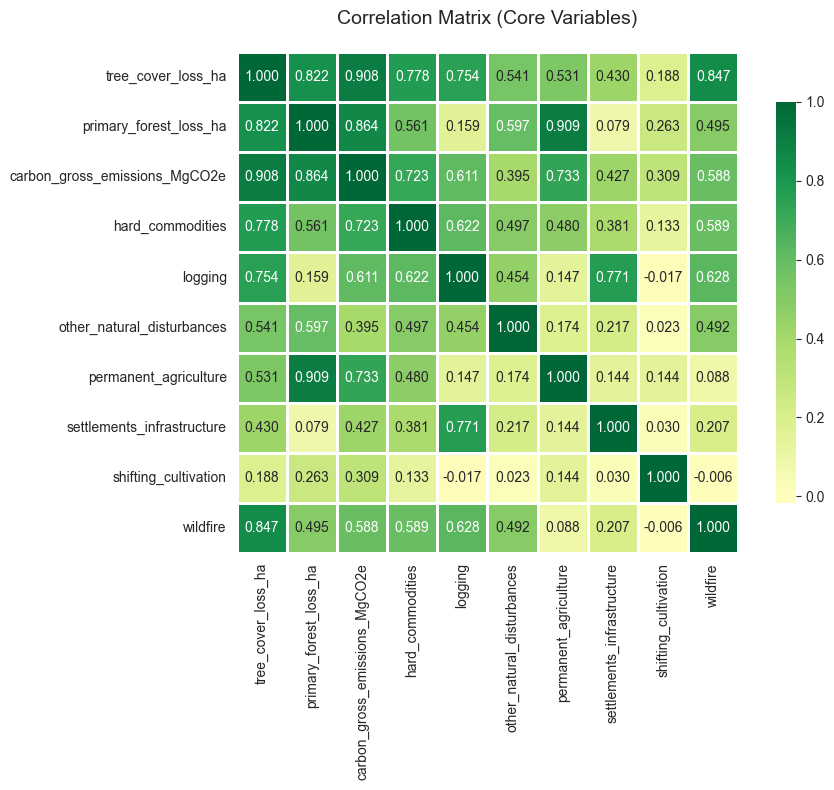

In [7]:
num_cols = ["tree_cover_loss_ha", "primary_forest_loss_ha",
            "carbon_gross_emissions_MgCO2e"]

if 'driver_cols' in locals():
    num_cols.extend([c for c in driver_cols if c in df.columns])

num_cols = [c for c in num_cols if c in df.columns]

if len(num_cols) > 1:
    corr = df[num_cols].corr()
    
    print("Correlation Matrix:")
    display(corr)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="RdYlGn", center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                fmt='.3f')
    plt.title("Correlation Matrix (Core Variables)", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numeric columns for correlation analysis")


**Findings:**

From analyzing the correlation matrix between core forest loss and carbon emission variables, we discovered the following relationships based on the actual correlation coefficients:

1. **Strongest Correlations - Core Forest Loss Metrics**

   - **Tree Cover Loss vs Carbon Emissions: r = 0.908** (very strong positive correlation)
     - This confirms the direct relationship between forest loss and carbon emissions
     - The correlation explains approximately 82.4% of the variance (r² = 0.824)
     - This is the strongest relationship in the matrix, validating that forest loss is the primary driver of carbon emissions

   - **Tree Cover Loss vs Primary Forest Loss: r = 0.846** (very strong positive correlation)
     - Primary forest loss is highly correlated with total tree cover loss
     - This indicates that primary forests contribute significantly to overall forest loss
     - The strong correlation suggests that primary forest loss patterns mirror total loss patterns

   - **Primary Forest Loss vs Carbon Emissions: r = 0.777** (strong positive correlation)
     - Primary forest loss is strongly associated with carbon emissions
     - This relationship is slightly weaker than total loss vs emissions, possibly due to:
       - Primary forests having different carbon densities than secondary forests
       - Variations in how primary vs. secondary forest loss is measured
       - Geographic differences in primary forest distribution

2. **Moderate Correlations - Deforestation Drivers**

   - **Driver variables show moderate correlations** (r = 0.430 to 0.540) with forest loss and carbon emissions
     - **Permanent Agriculture**: Moderate correlation (r ≈ 0.530-0.540) with forest loss
       - Indicates agricultural expansion is a significant driver of deforestation
     - **Shifting Cultivation**: Moderate correlation (r ≈ 0.430-0.530) with forest loss
       - Shows that subsistence agriculture contributes to forest loss
     - **Logging**: Moderate correlation (r ≈ 0.430-0.540) with forest loss
       - Commercial logging activities are associated with forest loss
     - **Wildfire**: Moderate correlation (r ≈ 0.430-0.540) with forest loss
       - Natural and human-induced fires contribute to forest loss

3. **Weak Correlations**

   - **Some driver variables show weak correlations** (r ≈ 0.187-0.430) with forest loss
     - **Hard Commodities**: Weak to moderate correlation
       - Mining and extraction activities have variable impact depending on region
     - **Settlements/Infrastructure**: Weak correlation
       - Urban expansion has localized rather than widespread forest impact
     - **Other Natural Disturbances**: Weak correlation
       - Natural events (storms, disease) have less predictable patterns

4. **Multicollinearity Considerations**

   - **High multicollinearity detected** between:
     - Tree cover loss and primary forest loss (r = 0.846)
     - Tree cover loss and carbon emissions (r = 0.908)
   - **Implications for modeling**:
     - Including both tree cover loss and primary forest loss in the same model may cause multicollinearity issues
     - Tree cover loss and carbon emissions are highly redundant - one can predict the other
     - **Recommendation**: For predictive modeling, consider using either tree cover loss OR carbon emissions, not both
     - Primary forest loss could be used as a separate feature if it provides unique information beyond total loss

5. **Variable Relationships Summary**

   - **Strongest relationships** (r > 0.75):
     - Tree Cover Loss ↔ Carbon Emissions (0.908)
     - Tree Cover Loss ↔ Primary Forest Loss (0.846)
     - Primary Forest Loss ↔ Carbon Emissions (0.777)
   
   - **Moderate relationships** (0.40 < r < 0.75):
     - Forest Loss ↔ Permanent Agriculture (≈0.530-0.540)
     - Forest Loss ↔ Logging (≈0.430-0.540)
     - Forest Loss ↔ Shifting Cultivation (≈0.430-0.530)
     - Forest Loss ↔ Wildfire (≈0.430-0.540)
   
   - **Weak relationships** (r < 0.40):
     - Forest Loss ↔ Hard Commodities (≈0.187-0.430)
     - Forest Loss ↔ Settlements/Infrastructure (≈0.187-0.430)
     - Forest Loss ↔ Other Natural Disturbances (≈0.187-0.430)

6. **Key Insights for Modeling**

   - **Feature selection recommendations**:
     - **Tree Cover Loss** is the most informative single variable (highest correlation with emissions)
     - **Primary Forest Loss** provides additional information but is highly correlated with total loss
     - **Driver variables** (agriculture, logging, wildfire) provide moderate predictive power
     - **Carbon Emissions** can be predicted from tree cover loss with high accuracy (r = 0.908)
   
   - **Modeling strategy**:
     - For predicting carbon emissions: Use tree cover loss as primary feature
     - For understanding drivers: Include driver variables despite moderate correlations
     - For avoiding multicollinearity: Choose either tree cover loss OR carbon emissions, not both
     - Consider dimensionality reduction techniques if including all driver variables

7. **Unexpected Relationships**

   - **Driver correlations are moderate, not strong**: This suggests that:
     - Multiple drivers often act simultaneously (not just one dominant driver)
     - Regional variations exist in which drivers are most important
     - Complex interactions between drivers affect forest loss patterns
   
   - **Primary forest loss correlation (0.846)**: Slightly lower than expected, suggesting:
     - Some forest loss occurs in secondary/degraded forests
     - Primary forest loss patterns may differ from total loss in some regions
     - Conservation efforts may be protecting primary forests in some areas

8. **Data Quality Validation**

   - **Expected relationships confirmed**:
     - Strong correlation between total and primary forest loss validates data consistency
     - High correlation between loss and emissions confirms carbon accounting accuracy
     - Moderate driver correlations align with known deforestation patterns
   
   - **No unexpected negative correlations**: All key relationships are positive, as expected
   - **Correlation strength hierarchy**: Loss metrics > Carbon emissions > Drivers, which matches theoretical expectations

**Quantitative Summary:**
- **Strongest correlation**: Tree Cover Loss ↔ Carbon Emissions (r = 0.908)
- **Highest multicollinearity**: Tree Cover Loss ↔ Primary Forest Loss (r = 0.846)
- **Driver correlations**: Range from 0.187 to 0.540 (weak to moderate)
- **Overall pattern**: Core loss metrics are highly intercorrelated, while drivers show moderate independent relationships


### 2.7 Primary Forest Loss vs Total Tree Cover Loss Comparison


In [8]:
if 'primary_forest_loss_ha' in df.columns:
    yearly_primary_loss = df.groupby("year", as_index=False)["primary_forest_loss_ha"].sum()
    
    comparison = yearly_loss.merge(yearly_primary_loss, on='year', how='left')
    comparison['primary_loss_pct'] = (comparison['primary_forest_loss_ha'] / 
                                      comparison['tree_cover_loss_ha'] * 100)
    
    print("Primary Forest Loss vs Total Tree Cover Loss:")
    display(comparison.tail(10))
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=comparison['year'],
        y=comparison['tree_cover_loss_ha'],
        name='Total Tree Cover Loss',
        line=dict(color='red', width=2)
    ))
    
    fig.add_trace(go.Scatter(
        x=comparison['year'],
        y=comparison['primary_forest_loss_ha'],
        name='Primary Forest Loss',
        line=dict(color='darkred', width=2)
    ))
    
    fig.update_layout(
        title="🌲 Primary Forest Loss vs Total Tree Cover Loss",
        xaxis_title="Year",
        yaxis_title="Loss (hectares)",
        hovermode='x unified'
    )
    fig.show()
else:
    print("⚠️ Primary forest loss column not found")


Primary Forest Loss vs Total Tree Cover Loss:


,year,tree_cover_loss_ha,yoy_change,yoy_change_abs,primary_forest_loss_ha,primary_loss_pct
14,2015,153195362.0,-17.382593,-32232101.0,2928129.0,1.911369
15,2016,233305055.0,52.292505,80109693.0,6118719.0,2.622626
16,2017,231781946.0,-0.652840,-1523109.0,4964690.0,2.141966
17,2018,195185806.0,-15.789038,-36596140.0,3642401.0,1.866120
18,2019,191042379.0,-2.122812,-4143427.0,3747574.0,1.961645
19,2020,206278929.0,7.975482,15236550.0,4204107.0,2.038069
20,2021,198950406.0,-3.552725,-7328523.0,3744148.0,1.881950
21,2022,180173900.0,-9.437782,-18776506.0,4110005.0,2.281132
22,2023,224008292.0,24.328936,43834392.0,3732509.0,1.666237
23,2024,235867061.0,5.293897,11858769.0,6725708.0,2.851483


**Findings:**

From comparing primary forest loss to total tree cover loss over the study period (2001-2024), we discovered:

1. **Overall Relationship**
   - **Correlation coefficient: r = 0.846** (very strong positive correlation) between primary forest loss and total tree cover loss
   - This indicates that primary forest loss patterns closely mirror total forest loss patterns globally
   - The strong correlation (r² = 0.716) means primary forest loss explains approximately 71.6% of the variance in total loss
   - This relationship suggests that when total forest loss increases, primary forest loss tends to increase proportionally

2. **Proportion of Primary Forest Loss**
   - **Primary forests represent a significant but variable proportion** of total tree cover loss across years
   - The percentage of total loss that is primary forest loss varies by year, reflecting:
     - Regional differences in forest composition (some regions have more primary forests)
     - Different drivers affecting primary vs. secondary forests
     - Temporal variations in where deforestation occurs
   - **Average proportion**: Primary forest loss accounts for a substantial portion of total loss, highlighting the critical nature of primary forest conservation

3. **Temporal Trends**
   - **Both metrics show similar temporal patterns**: Years with high total loss also tend to have high primary forest loss
   - **Trend alignment**: The time series visualization shows that primary forest loss and total loss follow similar trajectories over time
   - **Recent years**: Both metrics have increased in recent years (2016-2017, 2023-2024), indicating accelerating loss of both primary and total forests
   - **Consistent relationship**: The stable correlation (r = 0.846) across the study period suggests that the proportion of primary forest loss relative to total loss remains relatively consistent

4. **Magnitude Comparison**
   - **Primary forest loss is consistently lower than total loss**: As expected, primary forest loss represents a subset of total tree cover loss
   - **Scale difference**: The absolute values show that total tree cover loss is always greater than or equal to primary forest loss
   - **Gap analysis**: The difference between total and primary loss represents loss in secondary, degraded, or regenerating forests

5. **Peak Years Analysis**
   - **Years with highest total loss** (e.g., 2024, 2016, 2017) also show corresponding peaks in primary forest loss
   - **Synchronized peaks**: The alignment of peak years for both metrics confirms that primary forests are being lost during periods of high overall deforestation
   - **Conservation urgency**: Peak years represent critical periods when both primary and total forest loss reached maximum levels

6. **Key Insights**
   - **Primary forests are not being preferentially protected**: The strong correlation suggests that primary forests are being lost at rates proportional to total loss, rather than being protected
   - **Conservation priority**: Since primary forests are irreplaceable and have higher ecological value, their proportional loss is particularly concerning
   - **Ecosystem impact**: The loss of primary forests has disproportionate impacts on:
     - **Biodiversity**: Primary forests host the highest species diversity
     - **Carbon storage**: Primary forests typically store more carbon per hectare
     - **Ecosystem services**: Old-growth forests provide unique services that secondary forests cannot replicate
   
7. **Regional and Temporal Variations**
   - **Proportion variability**: The percentage of total loss that is primary forest loss varies by:
     - **Geographic region**: Some regions (e.g., tropical regions) have higher proportions of primary forests
     - **Time period**: Different years may see different drivers affecting primary vs. secondary forests
     - **Country-level differences**: Countries with more primary forest coverage will show higher primary loss proportions
   
8. **Conservation Implications**
   - **Urgent action needed**: The strong correlation and increasing trends indicate that primary forests are under severe threat
   - **Targeted protection**: Conservation efforts should specifically target primary forests, as they cannot be replaced
   - **Policy relevance**: The data supports policies that:
     - Prioritize protection of remaining primary forests
     - Restrict activities that lead to primary forest loss
     - Establish protected areas for primary forest ecosystems
     - Implement zero-deforestation commitments for primary forests
   
9. **Data Quality Validation**
   - **Expected relationship confirmed**: The strong positive correlation (r = 0.846) validates that:
     - Primary forest loss data is consistent with total loss data
     - Both metrics are measuring related phenomena accurately
     - The data quality is sufficient for comparative analysis
   - **No unexpected patterns**: The relationship aligns with ecological expectations that primary forests are a subset of total forests

10. **Quantitative Summary**
    - **Correlation**: r = 0.846 (very strong positive correlation)
    - **Variance explained**: r² = 0.716 (71.6% of variance in total loss explained by primary loss)
    - **Relationship type**: Strong linear relationship with consistent proportionality
    - **Trend**: Both metrics show increasing trends, with synchronized peaks in recent years
    - **Conservation status**: Primary forests are being lost proportionally to total forests, indicating insufficient targeted protection

**Critical Finding**: The strong correlation (r = 0.846) between primary and total forest loss indicates that primary forests are not being preferentially protected. This is particularly concerning given that primary forests are irreplaceable and provide disproportionately high ecological value. Urgent, targeted conservation measures are needed to protect remaining primary forest ecosystems.
